In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [1]:
import analysis

In [2]:
dataset = "../Results/learningrate_0.01_epochs_500__graphconv_[20]_dropout_0.0_attdim_10_attbias_2_fc_[]_model_gcn_maxdeg_1.selector_8_ang_ratio_0_params_all_onehot_distance.{}.csv"
att = dataset.format("attentions")
pred = dataset.format("predictions")
epoch = dataset.format("epoch")
silent_dir = "/mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosetta/HCV"

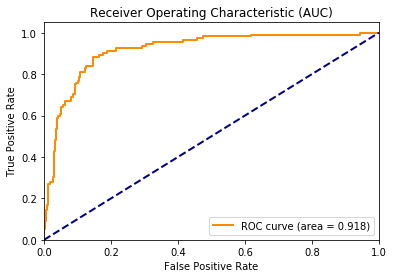

In [3]:
analysis.plot_auc(pred)

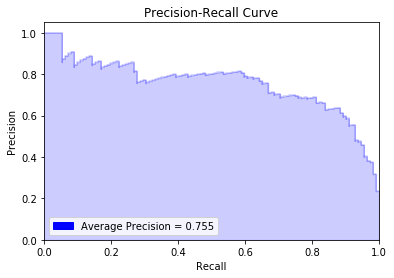

In [4]:
analysis.plot_aupr(pred)

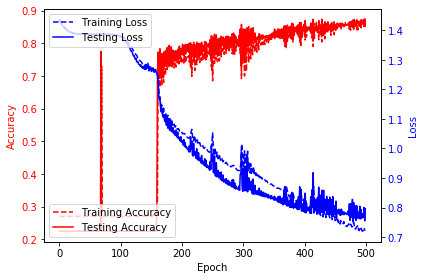

In [6]:
analysis.plot_progression(epoch)

In [7]:
analysis.attention_command(att, silent_dir, "AAAAAAC.ASHL", 0)

PyRosetta-4 2019 [Rosetta PyRosetta4.conda.linux.CentOS.python36.Release 2019.19+release.5adc612fd9dee20f808a07e761610d95698b0f35 2019-05-10T09:04:00] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.CentOS.python36.Release r221 2019.19+release.5adc612f 5adc612fd9dee20f808a07e761610d95698b0f35 http://www.pyrosetta.org 2019-05-10T09:04:00
core.init: command: PyRosetta -ex1 -ex2aro -database /home/samuelstentz/.conda/envs/pyrosetta/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=-371390376 seed_offset=0 real_seed=-371390376
core.init.random: RandomGenerator:init: Normal mode, seed=-371390376 RG_type=mt19937
core.io.silent.SilentFileData: Reading all structures from /mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRos